# 信用卡反欺诈检测

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec 
import seaborn as sns
import threading
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, precision_recall_curve, recall_score
from sklearn.preprocessing import StandardScaler,QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans

## 数据预处理

In [2]:
data = pd.read_csv('./datasets/archive/creditcard.csv')
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
data.describe().T

count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     284807.0 -1.247012e-15      0.999201  -18.683715     -0.405571   
V13     284807.0  8.190001e-16      0.995274   -5.791881     -0.648539   
V14     284807.0  1.207294e-15      0.958596  -19.214325     -0.425574   
V15     284807.0  4.887456e-15      0.915316   -4.498945     -0.582884   
V16     284807.0  1.437716e-15      0.876253  -14.129855     -0.468037   
V17     284807.0 -3.772171e-16      0.849337  -25.162799     -0.483748   
V18     284807.0  9.564149e-16      0.838176   -9.498746     -0.498850   
V19     284807.0  1.039917e-15      0.814041   -7.213527     -0.456299   
V20     284807.0  6.406204e-16      0.770925  -54.497720     -0.211721   
V21     284807.0  1.654067e-16      0.734524  -34.830382     -0.228395   
V22     284807.0 -3.568593e-16      0.725702  -10.933144     -0.542350   
V23     284807.0  2.578648e-16      0.624460  -44.807735     -0.161846   
V24     284807.0  4.473266e-15      0.605647   -2.836627     -0.354586   
V25     284807.0  5.340915e-16      0.521278  -10.295397     -0.317145   
V26     284807.0  1.683437e-15      0.482227   -2.604551     -0.326984   
V27     284807.0 -3.660091e-16      0.403632  -22.565679     -0.070840   
V28     284807.0 -1.227390e-16      0.330083  -15.430084     -0.052960   
Amount  284807.0  8.834962e+01    250.120109    0.000000      5.600000   
Class   284807.0  1.727486e-03      0.041527    0.000000      0.000000   

                 50%            75%            max  
Time    84692.000000  139320.500000  172792.000000  
V1          0.018109       1.315642       2.454930  
V2          0.065486       0.803724      22.057729  
V3          0.179846       1.027196       9.382558  
V4         -0.019847       0.743341      16.875344  
V5         -0.054336       0.611926      34.801666  
V6         -0.274187       0.398565      73.301626  
V7          0.040103       0.570436     120.589494  
V8          0.022358       0.327346      20.007208  
V9         -0.051429       0.597139      15.594995  
V10        -0.092917       0.453923      23.745136  
V11        -0.032757       0.739593      12.018913  
V12         0.140033       0.618238       7.848392  
V13        -0.013568       0.662505       7.126883  
V14         0.050601       0.493150      10.526766  
V15         0.048072       0.648821       8.877742  
V16         0.066413       0.523296      17.315112  
V17        -0.065676       0.399675       9.253526  
V18        -0.003636       0.500807       5.041069  
V19         0.003735       0.458949       5.591971  
V20        -0.062481       0.133041      39.420904  
V21        -0.029450       0.186377      27.202839  
V22         0.006782       0.528554      10.503090  
V23        -0.011193       0.147642      22.528412  
V24         0.040976       0.439527       4.584549  
V25         0.016594       0.350716       7.519589  
V26        -0.052139       0.240952       3.517346  
V27         0.001342       0.091045      31.612198  
V28         0.011244       0.078280      33.847808  
Amount     22.000000      77.165000   25691.160000  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum().sum()

0

## 特征工程

### 查看目标列分布

In [6]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_161212\1859150940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


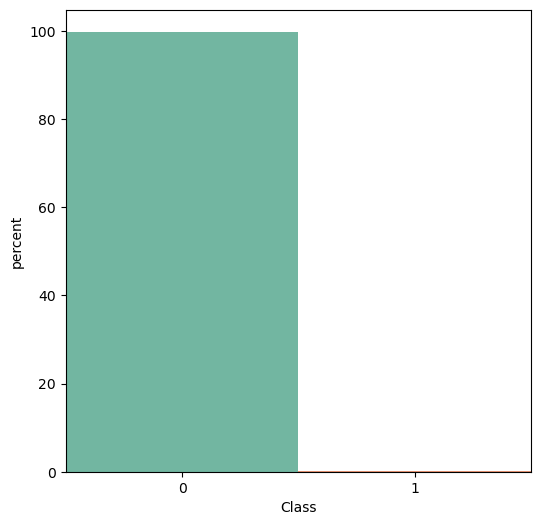

In [7]:
#可视化， 样本不平衡
fig = plt.subplots(figsize=(6,6))

sns.countplot(
    data = data,
    x = 'Class',
    palette = 'Set2',
    stat = 'percent',
    width = 1
)

figure = px.pie(
    data_frame = data,
    names = 'Class',
    color_discrete_sequence = px.colors.sequential.RdBu,
    hole = 0.4,
    title = 'Class Distribution',
    height = 600,
    width = 600
)
figure.show()

### 特征衍生

In [8]:
#转换时间尺度 以小时为单位, 减小离散性
data['Hour'] = data['Time'].apply(lambda x: divmod(x, 3600)[0])
data.Hour

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: Hour, Length: 284807, dtype: float64

### 特征选择

#### 查看两个类别的相关系数并可视化

Text(0.5, 1.0, 'Fraud')

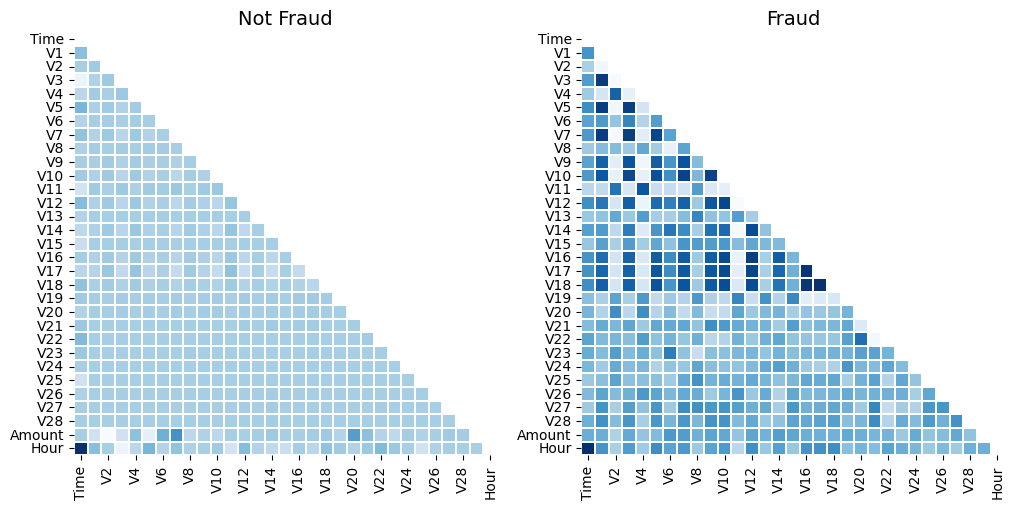

In [9]:
#未欺诈的相关系数
Corrnot_fraud = data[data['Class'] == 0].loc[:, data.columns != 'Class'].corr()

#欺诈的相关系数
Corr_fraud = data[data['Class'] == 1].loc[:, data.columns != 'Class'].corr()

#添加遮罩
mask = np.zeros_like(Corrnot_fraud)
mask[np.triu_indices_from(Corr_fraud)] = 1


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(
    data = Corrnot_fraud,
    cmap = 'Blues',
    annot = False,
    ax = ax[0],
    cbar = False,
    square = True,
    linecolor = 'w',
    linewidths = 0.1,
    mask = mask
)
sns.heatmap(
    data = Corr_fraud,
    cmap = 'Blues',
    ax = ax[1],
    cbar = False,
    annot = False,
    square = True,
    linecolor = 'w',
    linewidths = 0.1,
    mask = mask,
)
ax[0].set_title('Not Fraud', fontsize = 14)
ax[1].set_title('Fraud', fontsize = 14)

#### 查看盗刷与未盗刷交易金额与交易次数

In [10]:
fig, ax = plt.subplots(2,1, sharex = True, figsize = (12, 12))

sns.histplot(
    data[data['Class'] == 0],
    x = 'Amount',
    stat = 'count',
    bins = 40,
    color = 'g',
    ax = ax[0],
)

sns.histplot(
    data[data['Class'] == 1],
    x = 'Amount',
    stat = 'count',
    bins = 20,
    color = 'g',
    ax = ax[1]
)

ax[0].set_yscale('log')
ax[0].set_title('Not Fraud')
ax[1].set_title('Fraud')

Text(0.5, 1.0, 'Fraud')

#### 查看信用卡消费时间

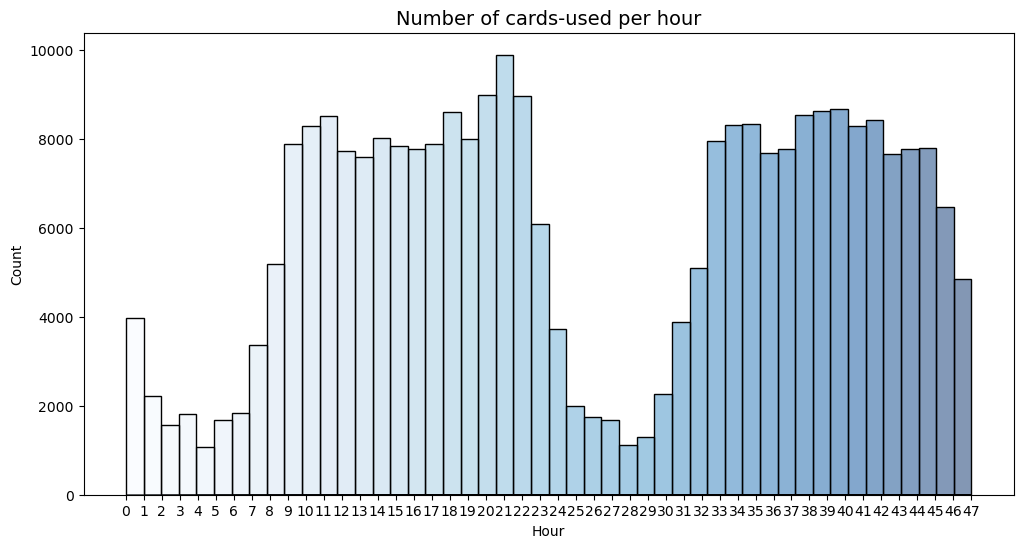

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(
    data = data,
    x = 'Hour',
    stat = 'count',
    hue = 'Hour',
    palette = 'Blues',
    legend = False,
    bins = 48
)

ax.set_title('Number of cards-used per hour', fontsize = 14)
_ = ax.set_xticks(data['Hour'].unique())

#### 查看盗刷与否的交易金额与时间的关系

In [12]:
cond1 = data['Class'] == 0
cond2 = data['Class'] == 1

fig, ax = plt.subplots(2,1,sharex = True, figsize = (12, 12))

sns.scatterplot(
    data[cond1],
    x = 'Hour',
    y = 'Amount',
    palette = 'Blues',
    ax = ax[0]
)

sns.scatterplot(
    data[cond2],
    x = 'Hour',
    y = 'Amount',
    palette = 'Blues',
    ax = ax[1]
)

ax[0].set_title('not Fraud')
ax[0].axhline(y = 5000, c = 'r')
ax[1].set_title('Fraud')
ax[1].axhline(y = 500, c = 'r')

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_161212\2269049802.py:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_161212\2269049802.py:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



#### 盗刷的交易金额与时间的关系

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(
    data = data[cond2],
    x = 'Hour',
    stat = 'count',
    hue = 'Hour',
    palette = 'coolwarm',
    legend = False,
    bins = 48
)

ax.set_xticks(range(0, 48))
ax.set_title('Connection of Fraud Amount and time', fontsize = 14)

Text(0.5, 1.0, 'Connection of Fraud Amount and time')

#### v1-v28特征分布

In [14]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

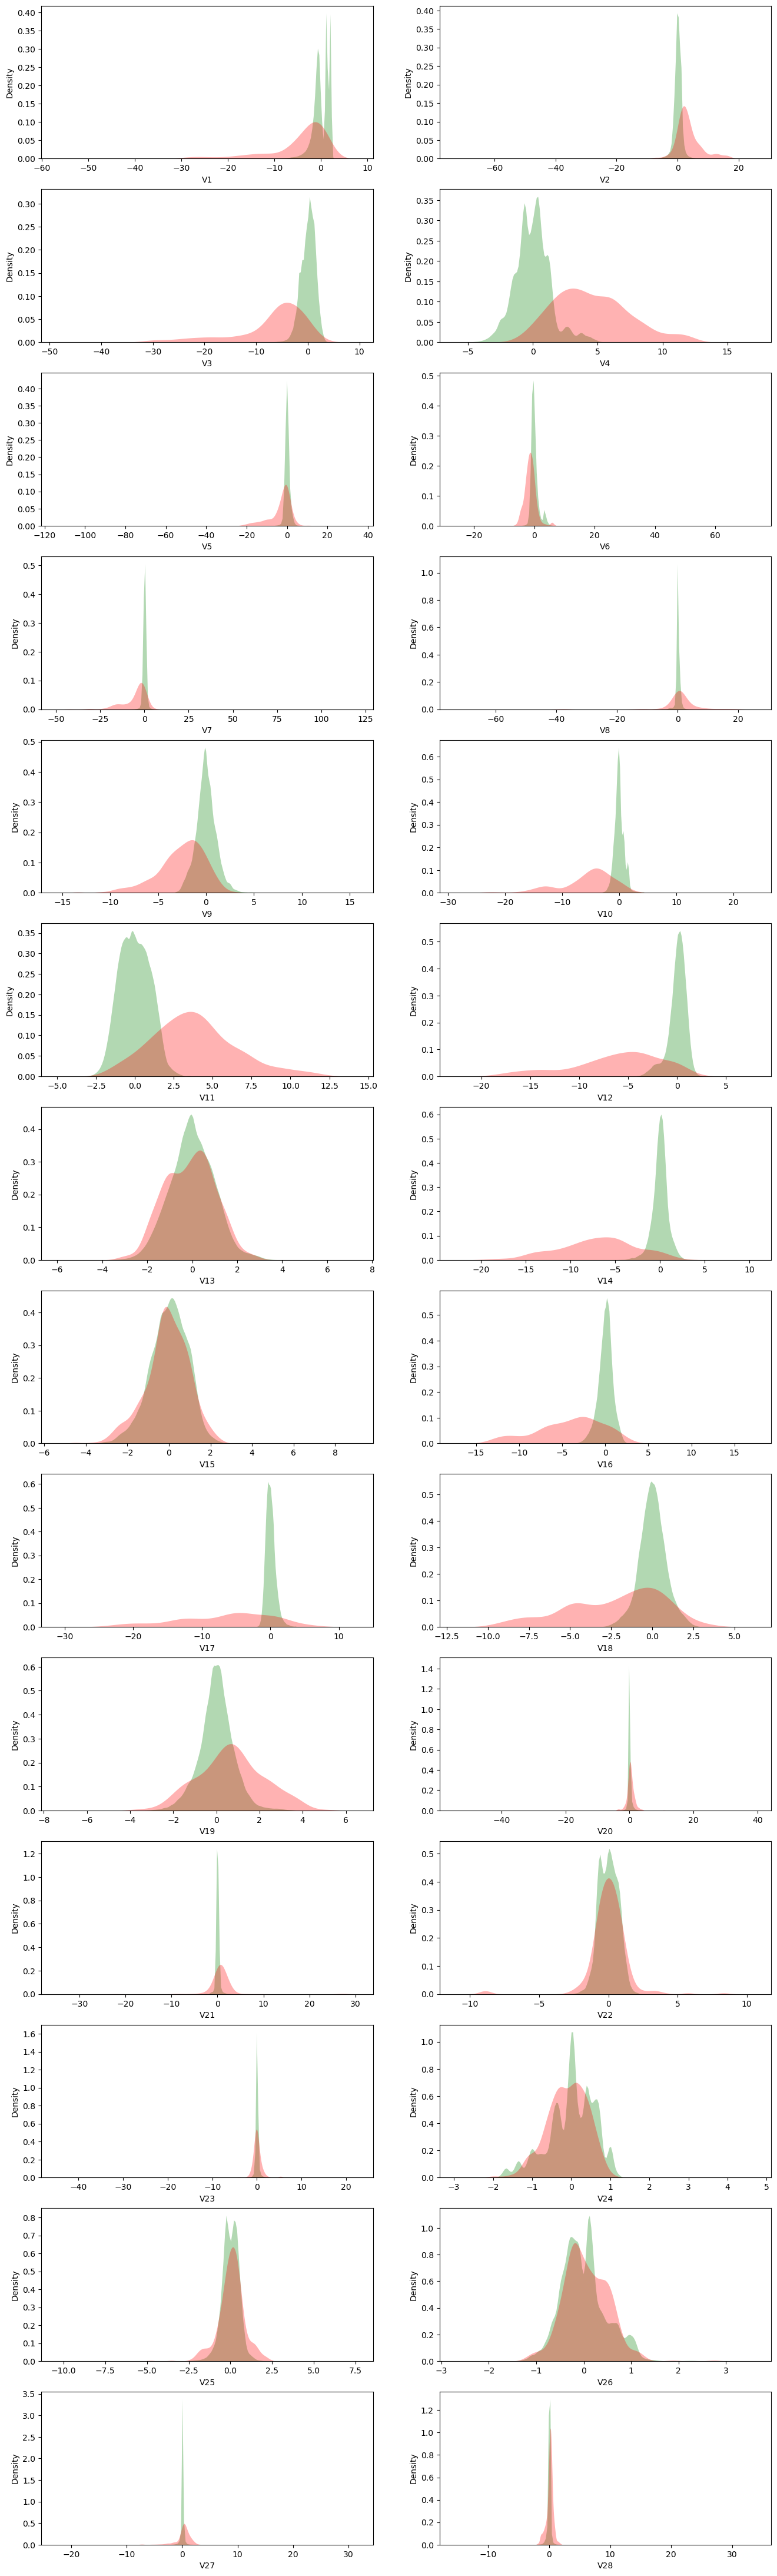

In [16]:
fig, axs = plt.subplots(14,2, figsize = (16, 56))

features = data.iloc[:, 1:-3].columns.to_numpy().reshape(14, 2)

def plot_kde(ax, data1, data2):
    sns.kdeplot(
            data = data1,
            ax = ax,
            color = 'green',
            fill = True,
            alpha = 0.3,
            linewidth = 0
        )
    sns.kdeplot(
            data = data2,
            ax = ax,
            color = 'red',
            fill = True,
            alpha = 0.3,
            linewidth = 0
        )
threads = []
for i in range(14):
    for j in range(2):
        feat_data_notfraud = data[cond1][features[i, j]]
        feat_data_fraud = data[cond2][features[i, j]]
        ax = axs[i][j]
        t = threading.Thread(target = plot_kde, args = (ax, feat_data_notfraud, feat_data_fraud))
        t.start()
        threads.append(t)

for thread in threads:
    thread.join()


### 特征清洗与缩放

In [17]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [18]:
new_data = data.drop(columns = ['Time', 'V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'])
new_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V9       V10       V11       V12       V14       V16       V17  \
0  0.363787  0.090794 -0.551600 -0.617801 -0.311169 -0.470401  0.207971   
1 -0.255425 -0.166974  1.612727  1.065235 -0.143772  0.463917 -0.114805   
2 -1.514654  0.207643  0.624501  0.066084 -0.165946 -2.890083  1.109969   
3 -1.387024 -0.054952 -0.226487  0.178228 -0.287924 -1.059647 -0.684093   
4  0.817739  0.753074 -0.822843  0.538196 -1.119670 -0.451449 -0.237033   

        V18       V19  Amount  Class  Hour  
0  0.025791  0.403993  149.62      0   0.0  
1 -0.183361 -0.145783    2.69      0   0.0  
2 -0.121359 -2.261857  378.66      0   0.0  
3  1.965775 -1.232622  123.50      0   0.0  
4 -0.038195  0.803487   69.99      0   0.0

In [20]:
stand = StandardScaler()

new_data[['Amount', 'Hour']] = stand.fit_transform(new_data[['Amount', 'Hour']])
new_data.describe().T

count          mean       std         min       25%       50%  \
V1      284807.0  1.168375e-15  1.958696  -56.407510 -0.920373  0.018109   
V2      284807.0  3.416908e-16  1.651309  -72.715728 -0.598550  0.065486   
V3      284807.0 -1.379537e-15  1.516255  -48.325589 -0.890365  0.179846   
V4      284807.0  2.074095e-15  1.415869   -5.683171 -0.848640 -0.019847   
V5      284807.0  9.604066e-16  1.380247 -113.743307 -0.691597 -0.054336   
V6      284807.0  1.487313e-15  1.332271  -26.160506 -0.768296 -0.274187   
V7      284807.0 -5.556467e-16  1.237094  -43.557242 -0.554076  0.040103   
V9      284807.0 -2.406331e-15  1.098632  -13.434066 -0.643098 -0.051429   
V10     284807.0  2.239053e-15  1.088850  -24.588262 -0.535426 -0.092917   
V11     284807.0  1.673327e-15  1.020713   -4.797473 -0.762494 -0.032757   
V12     284807.0 -1.247012e-15  0.999201  -18.683715 -0.405571  0.140033   
V14     284807.0  1.207294e-15  0.958596  -19.214325 -0.425574  0.050601   
V16     284807.0  1.437716e-15  0.876253  -14.129855 -0.468037  0.066413   
V17     284807.0 -3.772171e-16  0.849337  -25.162799 -0.483748 -0.065676   
V18     284807.0  9.564149e-16  0.838176   -9.498746 -0.498850 -0.003636   
V19     284807.0  1.039917e-15  0.814041   -7.213527 -0.456299  0.003735   
Amount  284807.0  2.913952e-17  1.000002   -0.353229 -0.330840 -0.265271   
Class   284807.0  1.727486e-03  0.041527    0.000000  0.000000  0.000000   
Hour    284807.0 -8.941442e-17  1.000002   -1.960264 -0.822591 -0.215832   

             75%         max  
V1      1.315642    2.454930  
V2      0.803724   22.057729  
V3      1.027196    9.382558  
V4      0.743341   16.875344  
V5      0.611926   34.801666  
V6      0.398565   73.301626  
V7      0.570436  120.589494  
V9      0.597139   15.594995  
V10     0.453923   23.745136  
V11     0.739593   12.018913  
V12     0.618238    7.848392  
V14     0.493150   10.526766  
V16     0.523296   17.315112  
V17     0.399675    9.253526  
V18     0.500807    5.041069  
V19     0.458949    5.591971  
Amount -0.044717  102.362243  
Class   0.000000    1.000000  
Hour    0.921841    1.604445

### 特征重要性排序

In [21]:
X = new_data.drop(columns = ['Class'])
y = new_data['Class']

In [41]:
#随机森林
rfc = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    max_depth = None,
    max_features = 0.8,
    n_jobs = -1
)

rfc.fit(X, y)

RandomForestClassifier(max_features=0.8, n_jobs=-1)

In [42]:
importances = rfc.feature_importances_

index = np.argsort(importances)[::-1]
X_feature = X.columns

importances = importances[index]
X_feature = X_feature[index]
X_feature

Index(['V17', 'V12', 'V14', 'V10', 'V4', 'V7', 'V9', 'V6', 'V16', 'V19',
       'Amount', 'Hour', 'V11', 'V1', 'V3', 'V18', 'V5', 'V2'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance')

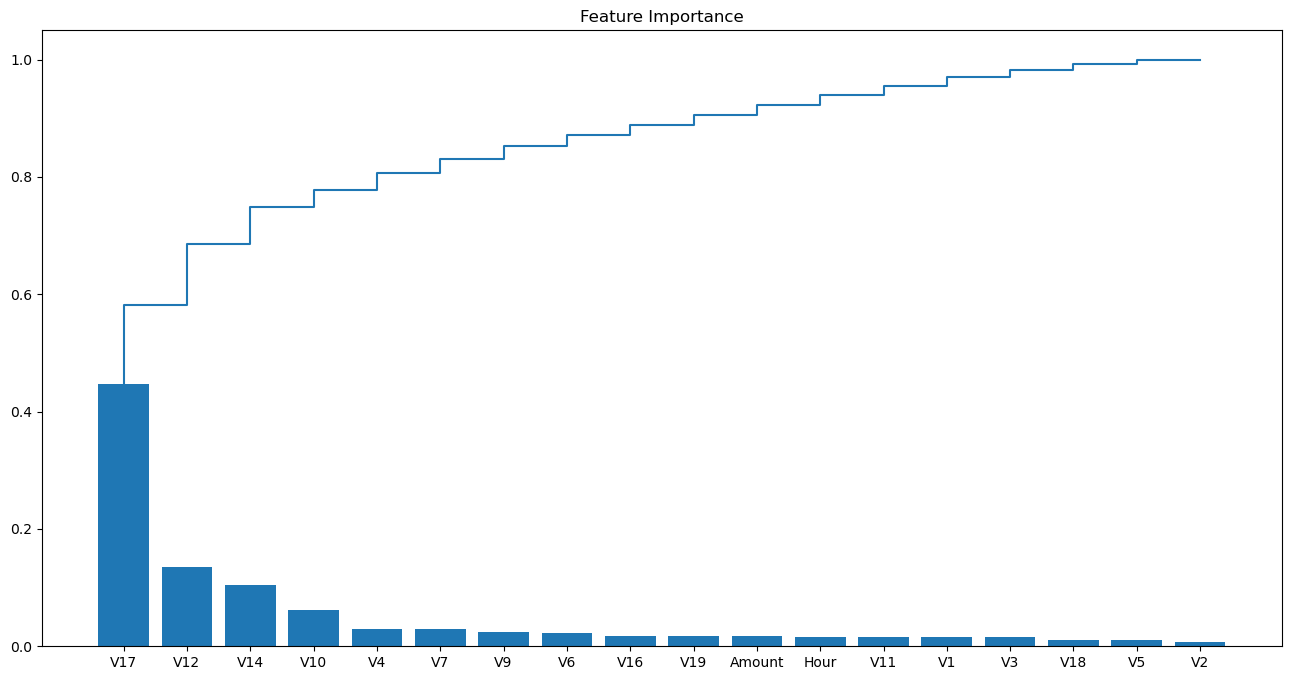

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))

plt.bar(
    range(len(importances)),
    importances,
    align='center'
)
plt.step(
    range(len(importances)),
    np.cumsum(importances),
)

ax.set_xticks(range(len(importances)), labels = X_feature)
ax.set_title('Feature Importance')

## 模型训练

### 样本不平衡， 使用过采样平衡数据

In [48]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
#过采样
smote = SMOTE()

X, y = smote.fit_resample(X, y)
y.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### 算法建模

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

display('准确率:', accuracy_score(y_pred = y_pred, y_true = y_test))

'准确率:'

0.9380030365381121

## 模型评估

### 混淆矩阵与召回率($TPR = \frac{TP}{TP + FN}$)

<Axes: >

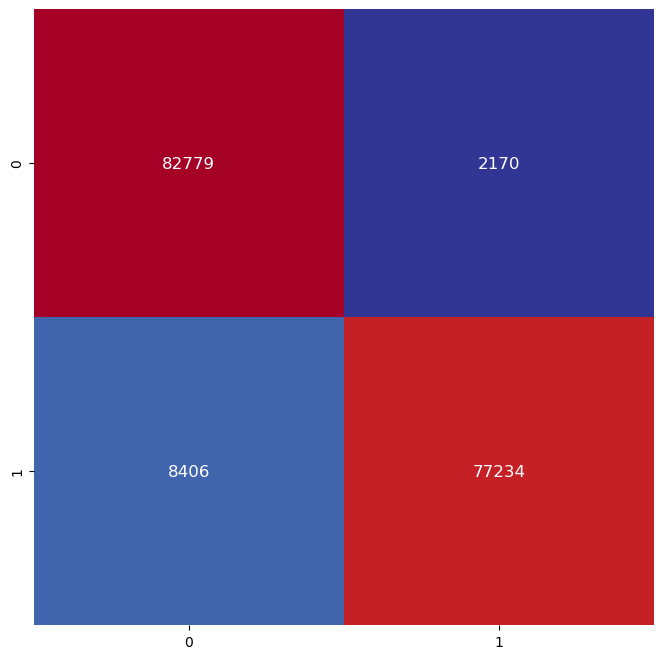

In [63]:
#计算混淆矩阵并可视化
conf_matx = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(conf_matx)

fig = plt.figure(figsize = (8, 8))

sns.heatmap(
    cm_df, 
    annot = True,
    cmap = 'RdYlBu_r',
    fmt = 'g',
    cbar = False,
    xticklabels = ['0', '1'],
    yticklabels = ['0', '1'],
    annot_kws = {'fontsize': 12},  
)

In [65]:
#计算召回率

recall = conf_matx[1,1] / (conf_matx[1,0] + conf_matx[1,1])
recall

0.901844932274638

### ROC-AUC曲线

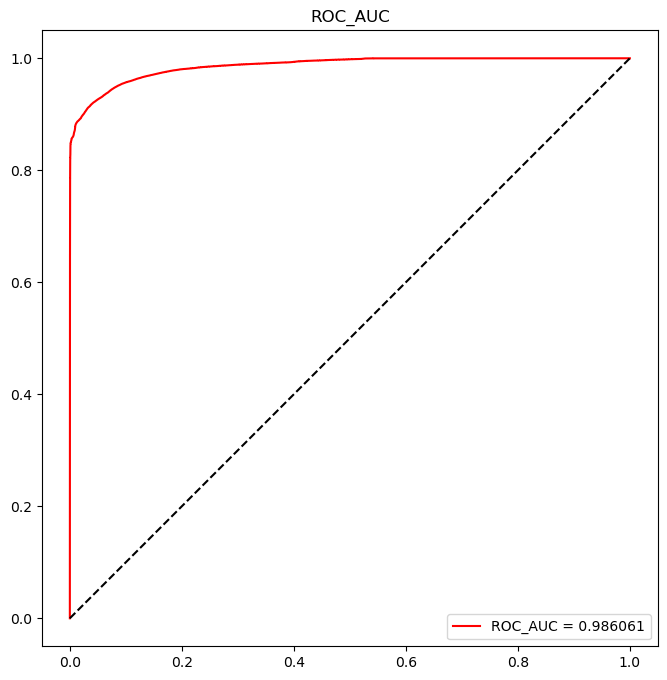

In [86]:
y_proba = lr.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
auc_roc = auc(fpr, tpr)


fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(fpr, tpr, c = 'r', label = 'ROC_AUC = %.6f' % auc_roc)
ax.plot([0, 1], [0, 1], c = 'k', ls = '--')
ax.set_title('ROC_AUC')
ax.legend(loc = 'lower right')
ax.set_aspect('equal', adjustable = 'box')

### 交叉验证网格搜索

In [ ]:
params = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(), n_jobs = -1, param_grid = params, cv = 10)
grid_search.fit(X_train, y_train)

d:\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "d:\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\miniconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, se

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [91]:
display(grid_search.best_params_, grid_search.best_score_)

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

{'C': 0.1, 'penalty': 'l2'}

0.938194807174171

0.9379913124527373

### 分类效果评估报告

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     84949
           1       0.97      0.90      0.94     85640

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



### 模型评估最优阈值

#### 计算不同阈值的混淆矩阵

Threshold: 0.1
F1 Score: 0.8888044940264261	Recall: 0.9837926202709014	precise: 0.8105440377122517

Threshold: 0.2
F1 Score: 0.9309806104884021	Recall: 0.9567608594114899	precise: 0.90655322350442

Threshold: 0.3
F1 Score: 0.9367821831618895	Recall: 0.9309901914992994	precise: 0.9426466937018952

Threshold: 0.4
F1 Score: 0.9383098439957187	Recall: 0.9161723493694536	precise: 0.9615436463682153

Threshold: 0.5
F1 Score: 0.9359048934777867	Recall: 0.9017865483418963	precise: 0.9727064335734797

Threshold: 0.6
F1 Score: 0.9337788057911419	Recall: 0.8909388136384867	precise: 0.9809467486050757

Threshold: 0.7
F1 Score: 0.9330625557709468	Recall: 0.8852055114432508	precise: 0.9863899551102726

Threshold: 0.8
F1 Score: 0.9306303687716065	Recall: 0.8785730966837926	precise: 0.9892451912331216

Threshold: 0.9
F1 Score: 0.9231259250932119	Recall: 0.8629729098552078	precise: 0.9922931296070033



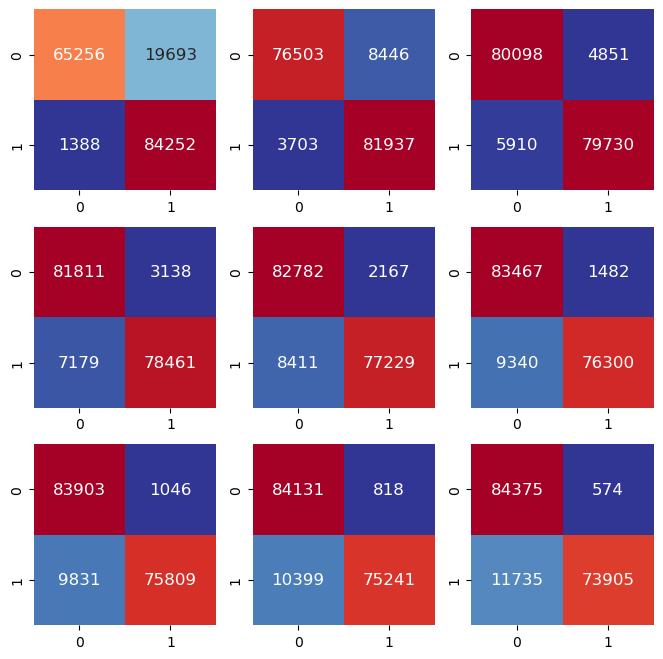

In [101]:

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_proba = grid_search.predict_proba(X_test)

fig, ax = plt.subplots(3,3, figsize = (8, 8))

for id, t in enumerate(thresholds):
    y_pred = (y_proba [:,1] >= t).astype(int)
    
    print(f"Threshold: {t}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}", end = '\t')
    print(f"Recall: {recall_score(y_test, y_pred)}", end = '\t')
    print("precise:", precision_score(y_test, y_pred), end = '\n\n')

    conf_matx = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(conf_matx)

    sns.heatmap(
        cm_df, 
        annot = True,
        cmap = 'RdYlBu_r',
        fmt = 'g',
        cbar = False,
        xticklabels = ['0', '1'],
        yticklabels = ['0', '1'],
        annot_kws = {'fontsize': 12},
        ax = ax[int(id // 3),int(id % 3)]  
    )

#### 计算不同阈值的PR(precise-recall)图

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_161212\688258259.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



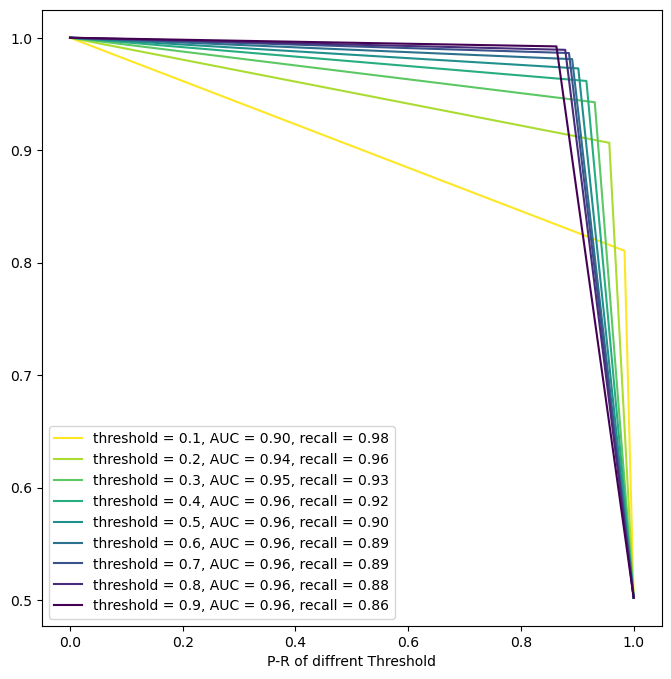

In [122]:
thresholds = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#获取颜色序列
color_map = mpl.cm.get_cmap('viridis_r', 9)
colors = [color_map(i) for i in range(9)]

fig, ax = plt.subplots(figsize = (8, 8))

for t, c in zip(thresholds, colors):
    y_pred = (y_proba[:,1] > t).astype(int)
    
    precise, recall, thrd = precision_recall_curve(y_test, y_pred)
    
    r = recall_score(y_test, y_pred)
    area = auc(recall, precise)

    ax.plot(
        recall,     
        precise, 
        color = c, 
        label = f'threshold = {t:.1f}, AUC = {area:.2f}, recall = {r:.2f}'
    )
    ax.legend(loc = 'lower left')
    ax.set_xlabel('P-R of diffrent Threshold')

#### 不同阈值的roc图

C:\Users\wxhlo\AppData\Local\Temp\ipykernel_161212\3032585786.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



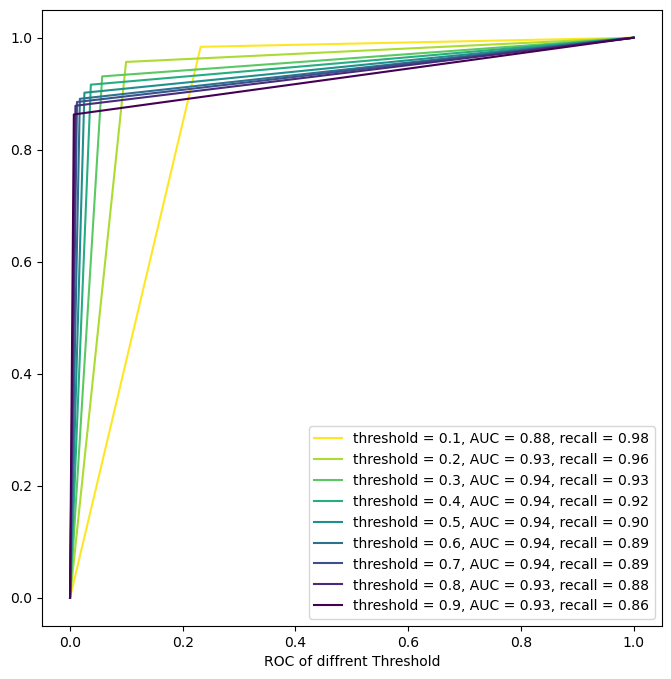

In [134]:
thresholds = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#获取颜色序列
color_map = mpl.cm.get_cmap('viridis_r', 9)
colors = [color_map(i) for i in range(9)]

fig, ax = plt.subplots(figsize = (8, 8))

for t, c in zip(thresholds, colors):
    y_pred = (y_proba[:,1] > t).astype(int)
    
    fpr, tpr, thrd = roc_curve(y_test, y_pred)
    
    r = recall_score(y_test, y_pred)
    area = auc(fpr, tpr)

    ax.plot(
        fpr,     
        tpr, 
        color = c, 
        label = f'threshold = {t:.1f}, AUC = {area:.2f}, recall = {r:.2f}'
    )
    ax.legend(loc = 'lower right')
    ax.set_xlabel('ROC of diffrent Threshold')

#### 不同阈值recall-precise-auc的变化趋势

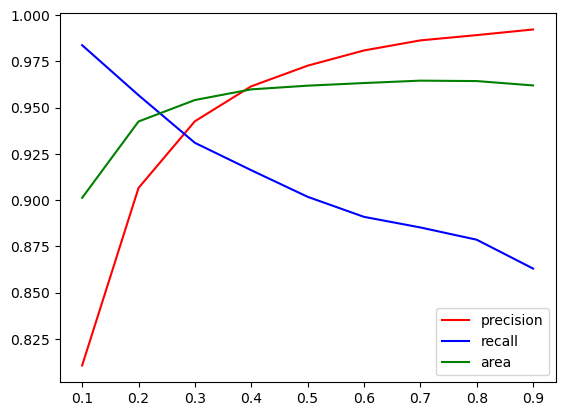

In [135]:
thresholds = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

precisions = []
recalls = []
areas = []

for z in thresholds:
    y_pred = (y_proba[:,1] >= z).astype(int)
    
    r = recall_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    # fpr, tpr, thed = roc_curve(y_test, y_pred)
    precise, recall, thed = precision_recall_curve(y_test, y_pred)
    
    area = auc(recall, precise)
    precisions.append(p)
    recalls.append(r)
    areas.append(area)

plt.plot(thresholds, precisions, label='precision', c = 'r')
plt.plot(thresholds, recalls, label='recall', c = 'b')
plt.plot(thresholds, areas, label='area', c = 'g')

plt.legend(loc = 'best')